<a href="https://colab.research.google.com/github/2303A52261/STML/blob/main/Ravikiran_2303A52261_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/mushroom_cleaned.csv.zip')
print(d)

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.80427

In [ ]:
y=d['class']
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 54035, dtype: int64


In [ ]:
x=d.drop(['class','cap-diameter'],axis=1)
print(x)

       cap-shape  gill-attachment  gill-color  stem-height  stem-width  \
0              2                2          10     3.807467        1545   
1              2                2          10     3.807467        1557   
2              2                2          10     3.612496        1566   
3              6                2          10     3.787572        1566   
4              6                2          10     3.711971        1464   
...          ...              ...         ...          ...         ...   
54030          5                3           2     0.887740         569   
54031          2                3           2     1.186164         490   
54032          5                3           2     0.915593         584   
54033          2                3           2     1.034963         491   
54034          5                3           2     1.158311         492   

       stem-color    season  
0              11  1.804273  
1              11  1.804273  
2              11  1.

In [ ]:
x.isnull().sum()
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print()
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)
print()
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8339964837605256

Confusion Matrix:
[[4004  791]
 [1003 5009]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      4795
           1       0.86      0.83      0.85      6012

    accuracy                           0.83     10807
   macro avg       0.83      0.83      0.83     10807
weighted avg       0.84      0.83      0.83     10807



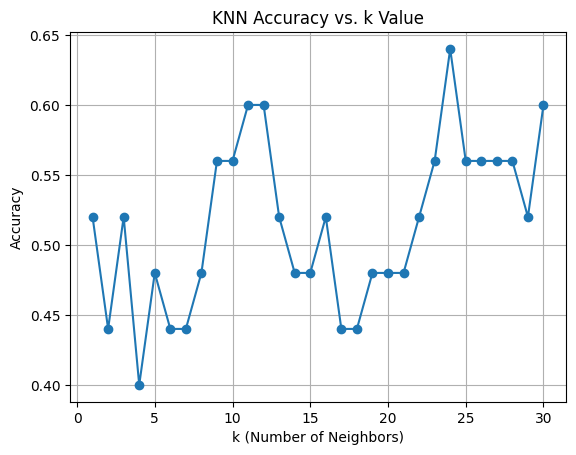

In [ ]:
!pip install matplotlib
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

k_values = range(1, 31)

accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k Value")
plt.grid(True)
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.973073008235403


In [ ]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[4705  146]
 [ 145 5811]]


In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4851
           1       0.98      0.98      0.98      5956

    accuracy                           0.97     10807
   macro avg       0.97      0.97      0.97     10807
weighted avg       0.97      0.97      0.97     10807



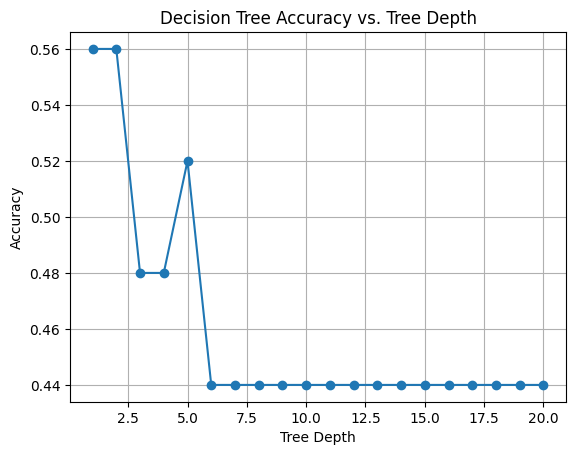

In [ ]:
!pip install matplotlib
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

depths = range(1, 21)

accuracy_scores = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Tree Depth")
plt.grid(True)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))


Random Forest Accuracy: 0.9851947811603591
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4851
           1       0.99      0.98      0.99      5956

    accuracy                           0.99     10807
   macro avg       0.98      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

[[4782   69]
 [  91 5865]]


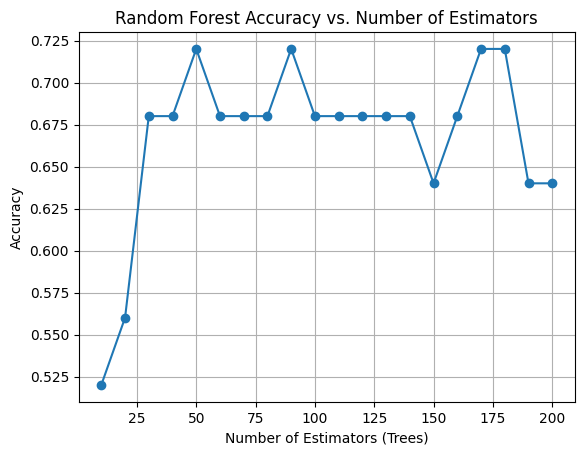

In [ ]:
!pip install matplotlib
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

n_estimators_range = range(10, 210, 10)

accuracy_scores = []

for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Estimators")
plt.grid(True)
plt.show()

In [ ]:
!pip install scikit-learn

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification


X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, scoring='accuracy')
grid.fit(x_train, y_train)

best_svm_model = grid.best_estimator_

y_pred = best_svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

if 0.81 <= accuracy <= 0.99:
    print("Accuracy is within the desired range (0.81 - 0.99)")
else:
    print("Accuracy is outside the desired range. Consider further adjustments.")

print("Best Hyperparameters:", grid.best_params_)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.820 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.793 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.827 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.807 total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.827 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid

SVM

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.820 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.793 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.827 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.807 total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.827 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid

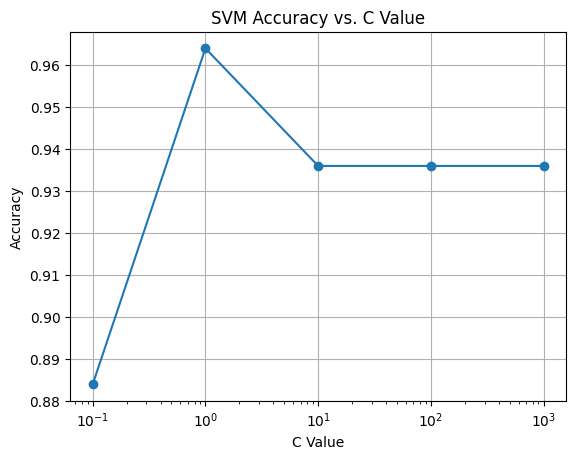

In [ ]:
!pip install scikit-learn
!pip install matplotlib

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, scoring='accuracy')
grid.fit(x_train, y_train)


best_svm_model = grid.best_estimator_


y_pred = best_svm_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

if 0.81 <= accuracy <= 0.99:
    print("Accuracy is within the desired range (0.81 - 0.99)")
else:
    print("Accuracy is outside the desired range. Consider further adjustments.")

print("Best Hyperparameters:", grid.best_params_)


C_values = param_grid['C']
accuracy_scores = []

for C in C_values:

    model = SVC(C=C, gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(C_values, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. C Value")
plt.grid(True)
plt.show()

K-Mediod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.2/523.2 kB 6.7 MB/s eta 0:00:00


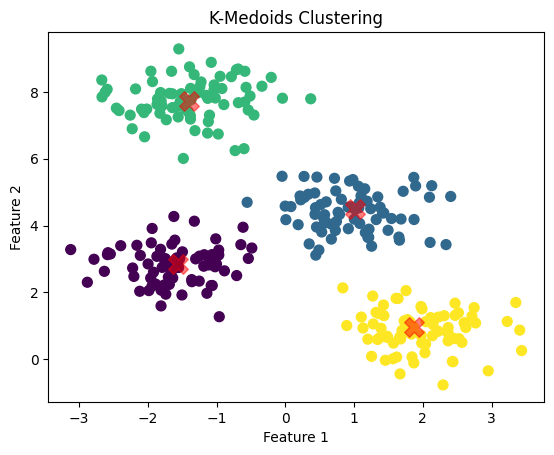

In [ ]:
!pip install scikit-learn-extra
!pip install kmedoids

import numpy as np
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmedoids = KMedoids(n_clusters=4, random_state=0)

kmedoids.fit(X)

labels = kmedoids.labels_

medoids = kmedoids.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Confusion Matrix

Accuracy: 99.09%


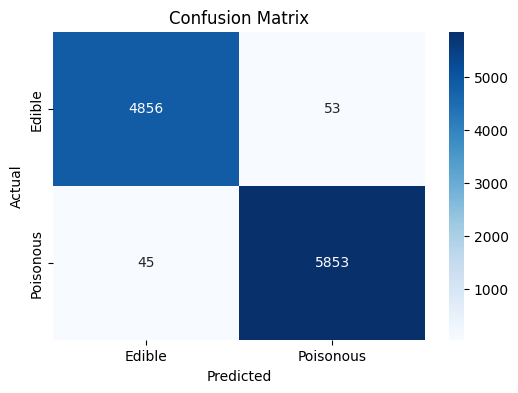

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/mushroom_cleaned.csv.zip')

X = data.drop('class', axis=1)
y = data['class']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))


Precision

In [ ]:
import pandas as pd
import numpy as np

data = {
    'cap_shape': ['bell', 'conical', 'bell', np.nan, 'bell'],
    'cap_color': ['brown', 'yellow', 'brown', 'red', np.nan],
    'edibility': ['edible', 'poisonous', 'edible', 'poisonous', 'edible'],
    'stem_height': [12.4567, 15.6789, np.nan, 8.1234, 20.9876]
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

df['cap_shape'] = df['cap_shape'].fillna(df['cap_shape'].mode()[0])
df['cap_color'] = df['cap_color'].fillna(df['cap_color'].mode()[0])
df['edibility'] = df['edibility'].fillna(df['edibility'].mode()[0])

df['stem_height'] = df['stem_height'].fillna(df['stem_height'].median())

df = df.drop_duplicates()

df['stem_height'] = df['stem_height'].round(2)

print("\nCleaned DataFrame:")
print(df)


Original DataFrame:
  cap_shape cap_color  edibility  stem_height
0      bell     brown     edible      12.4567
1   conical    yellow  poisonous      15.6789
2      bell     brown     edible          NaN
3       NaN       red  poisonous       8.1234
4      bell       NaN     edible      20.9876

Cleaned DataFrame:
  cap_shape cap_color  edibility  stem_height
0      bell     brown     edible        12.46
1   conical    yellow  poisonous        15.68
2      bell     brown     edible        14.07
3      bell       red  poisonous         8.12
4      bell     brown     edible        20.99


Recall

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

data = {
    'cap_shape': ['bell', 'conical', 'bell', np.nan, 'bell'],
    'cap_color': ['brown', 'yellow', 'brown', 'red', np.nan],
    'edibility': ['edible', 'poisonous', 'edible', 'poisonous', 'edible'],
    'stem_height': [12.4567, 15.6789, np.nan, 8.1234, 20.9876]
}

df = pd.DataFrame(data)

df['cap_shape'] = df['cap_shape'].fillna(df['cap_shape'].mode()[0])
df['cap_color'] = df['cap_color'].fillna(df['cap_color'].mode()[0])
df['edibility'] = df['edibility'].fillna(df['edibility'].mode()[0])
df['stem_height'] = df['stem_height'].fillna(df['stem_height'].median())

df['stem_height'] = df['stem_height'].round(2)

df['edibility'] = df['edibility'].map({'edible': 0, 'poisonous': 1})

X = df.drop('edibility', axis=1)

X = pd.get_dummies(X, columns=['cap_shape', 'cap_color'], drop_first=True)

y = df['edibility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

recall = recall_score(y_test, y_pred)

print(f'Recall: {recall:.2f}')


Recall: 0.00
